<a href="https://colab.research.google.com/github/ShauryaCodes2004/ANPR-SYSTEM/blob/main/tryingagain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 28.2 MB/s eta 0:00:00


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

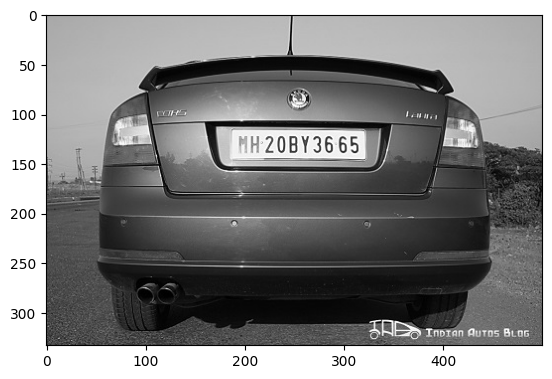

In [54]:
img = cv2.imread('/content/0c9ebe94-827d-4c74-9950-6816e70d1bab___IMG_8883.jpg.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

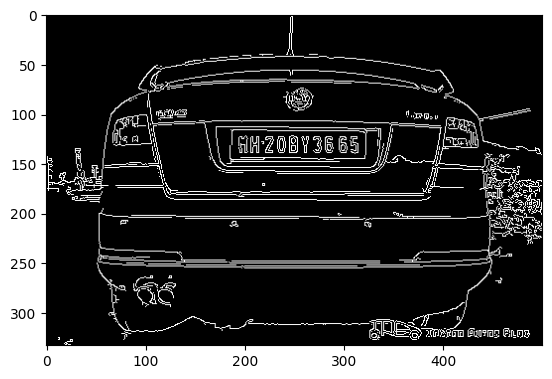

In [55]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [56]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [57]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [58]:
location

array([[[159, 109]],

       [[348, 112]],

       [[331, 157]],

       [[174, 154]]], dtype=int32)

In [59]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

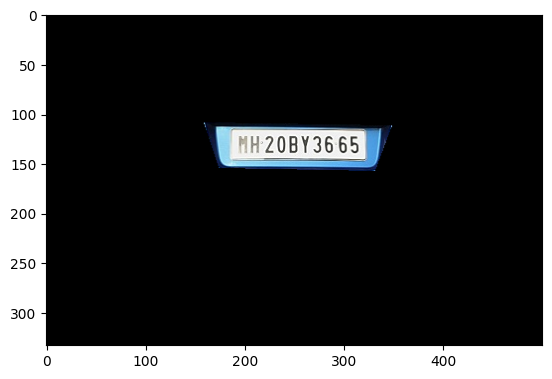

In [60]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

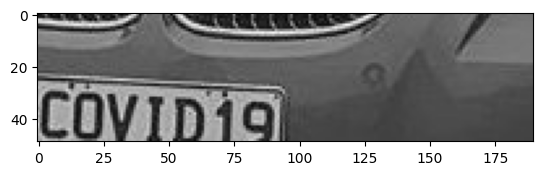

In [156]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

[([[16, 1], [213, 1], [213, 47], [16, 47]], 'MH14EU3498', 0.7386096462052573)]

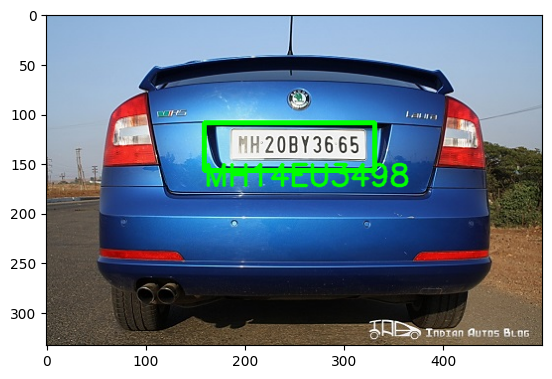

In [63]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))


In [64]:
result

[([[16, 1], [213, 1], [213, 47], [16, 47]], 'MH14EU3498', 0.7386096462052573)]

In [65]:


# Access the string 'HR.26 BR.9044' using indexing
my_string = result[0][1]

# Print the extracted string
print(my_string)


MH14EU3498


# **trying with diffrent car **


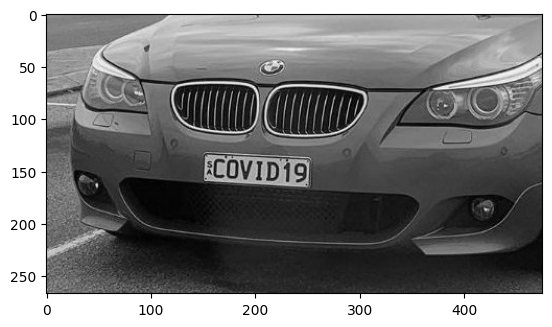

In [142]:
img_2 = cv2.imread('image2.jpg')
gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

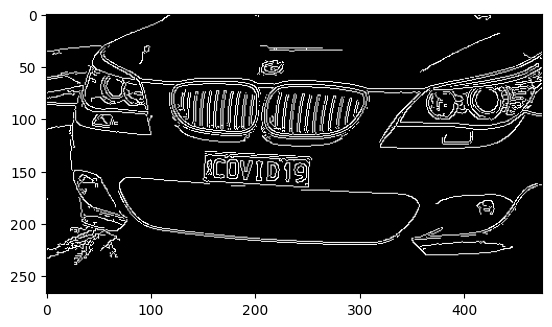

In [143]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [144]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [145]:
location_2 = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location_2 = approx
        break

In [146]:
location_2

array([[[152, 136]],

       [[248, 139]],

       [[251, 164]],

       [[153, 160]]], dtype=int32)

In [147]:
mask = np.zeros(gray.shape, np.uint8)
new_image_2= cv2.drawContours(mask, [location], 0,255, -1)
new_image_2 = cv2.bitwise_and(img_2, img_2, mask=mask)

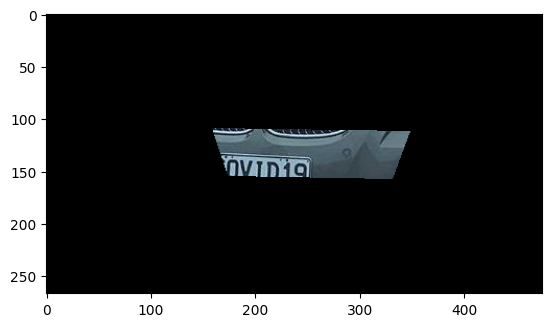

In [148]:
plt.imshow(cv2.cvtColor(new_image_2, cv2.COLOR_BGR2RGB))

In [149]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

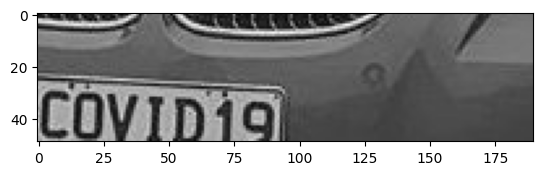

In [150]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [151]:
reader = easyocr.Reader(['en'])
result_2 = reader.readtext(cropped_image)
result_2


[([[0, 24], [66, 24], [66, 49], [0, 49]], 'covid', 0.7522375019037383)]

In [152]:
result

[([[16, 1], [213, 1], [213, 47], [16, 47]], 'MH14EU3498', 0.7386096462052573)]

In [153]:
result_2

[([[0, 24], [66, 24], [66, 49], [0, 49]], 'covid', 0.7522375019037383)]

In [154]:
if(result==result_2):
  print("one of them is fake ")
if(result!=result_2):
   print("ohh nice both are diffrent")



ohh nice both are diffrent
